<a href="https://colab.research.google.com/github/mcalmeida13/math-machine-learning/blob/main/l2_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

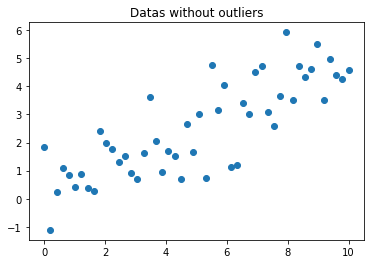

In [2]:
# Generate the data without outliners

N = 50 #sample size

X = np.linspace(0,10,N)
e = np.random.randn(N) #normaly distributed bias (noise)
Y = 0.5*X + e

# plot the data
plt.scatter(X, Y)
plt.title("Datas without outliers")
plt.show()

The random bias makes data spread a little, but not to far from the y = 0.5*x

In [3]:
# Add outliers
Y[-1] += 30
Y[-2] += 30

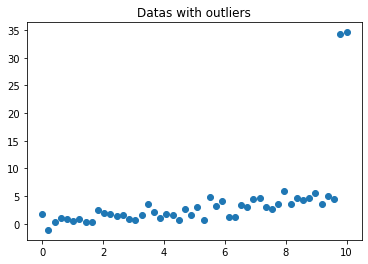

In [4]:
# plot the data
plt.scatter(X, Y)
plt.title("Datas with outliers")
plt.show()

In [5]:
df = pd.DataFrame()
#Bias term
df['X0'] = np.ones(len(X))
df['X1'] = X
df['Y'] = Y

df.head()

,X0,X1,Y
0,1.0,0.000000,1.824745
1,1.0,0.204082,-1.112397
2,1.0,0.408163,0.246344
3,1.0,0.612245,1.080883
4,1.0,0.816327,0.842401


In [7]:
X = df.drop('Y', axis = 1)
Y = df['Y']

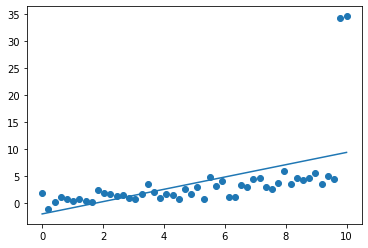

In [9]:
# plot the maximum likelihood solution
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)
plt.scatter(X['X1'], Y)
plt.plot(X['X1'], Yhat_ml)
plt.show()

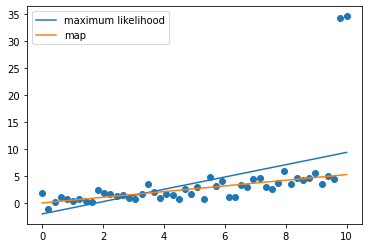

In [21]:
l2 = 1000
w_map = np.linalg.solve((l2*np.eye(2) + X.T.dot(X)), X.T.dot(Y))
Yhat_map = X.dot(w_map)
plt.scatter(X['X1'], Y)
plt.plot(X['X1'], Yhat_ml, label='maximum likelihood')
plt.plot(X['X1'], Yhat_map, label='map')
plt.legend()
plt.show()

In [22]:
def get_r2(Y,Yhat):
    # determine how good the model is by computing the r-squared
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

print("r2 for maximum likelihood:", get_r2(Y, Yhat_ml))
print("r2 for map:", get_r2(Y, Yhat_map))

r2 for maximum likelihood: 0.2677345690628192
r2 for map: 0.1644493104972261
